# Quantitative image analysis
After segmenting and labeling objects in an image, we can measure properties of these objects.

See also
* [SciPy lecture notes: Measuring region properties](https://scipy-lectures.org/packages/scikit-image/index.html#measuring-regions-properties)
* [Plot regionprops](https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_regionprops.html)

Before we can do measurements, we need an `image` and a corresponding `label_image`. Therefore, we recapitulate filtering, thresholding and labeling:

In [1]:
from skimage.io import imread
from skimage import filters
from skimage import measure
from pyclesperanto_prototype import imshow
import pandas as pd 
import numpy as np

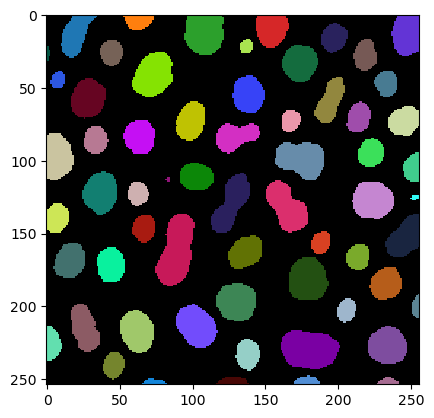

In [2]:
# load image
image = imread("../../data/blobs.tif")

# denoising
blurred_image = filters.gaussian(image, sigma=1)

# binarization
threshold = filters.threshold_otsu(blurred_image)
thresholded_image = blurred_image >= threshold

# labeling
label_image = measure.label(thresholded_image)

# visualization
imshow(label_image, labels=True)

## Measurements / region properties
To read out properties from regions, we use the [`regionprops`](https://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.regionprops) function:

In [3]:
# analyse objects
properties = measure.regionprops(label_image, intensity_image=image)

The results are stored as `RegionProps` objects, which are not very informative:

In [4]:
properties[0:5]

If you are interested which properties we measured: They are listed in the [documentation of the `measure.regionprops` function](https://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.regionprops). Basically, we now have a variable `properties` which contains 40 different features. But we are only interested in a small subset of them.

Therefore, we can reorganize the measurements into a dictionary containing arrays with our features of interest:

In [5]:
statistics = {
    'area':       [p.area               for p in properties],
    'mean':       [p.mean_intensity     for p in properties],
    'major_axis': [p.major_axis_length  for p in properties],
    'minor_axis': [p.minor_axis_length for p in properties]
}

Reading those dictionaries of arrays is not very convenient. For that we introduce [pandas DataFrames](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) which are commonly used by data scientists. "DataFrames" is just another term for "tables" used in Python.  

In [8]:
df = pd.DataFrame(statistics)
df

,area,mean,major_axis,minor_axis
0,429,191.440559,34.779230,16.654732
1,183,179.846995,20.950530,11.755645
2,658,205.604863,30.198484,28.282790
3,433,217.515012,24.508791,23.079220
4,472,213.033898,31.084766,19.681190
...,...,...,...,...
57,213,184.525822,18.753879,14.468993
58,79,184.810127,18.287489,5.762488
59,88,182.727273,21.673692,5.389867
60,52,189.538462,14.335104,5.047883


You can also add custom columns by computing your own metric, for example the `aspect_ratio`:

In [9]:
df['aspect_ratio'] = [p.major_axis_length / p.minor_axis_length for p in properties]
df

,area,mean,major_axis,minor_axis,aspect_ratio
0,429,191.440559,34.779230,16.654732,2.088249
1,183,179.846995,20.950530,11.755645,1.782168
2,658,205.604863,30.198484,28.282790,1.067734
3,433,217.515012,24.508791,23.079220,1.061942
4,472,213.033898,31.084766,19.681190,1.579415
...,...,...,...,...,...
57,213,184.525822,18.753879,14.468993,1.296143
58,79,184.810127,18.287489,5.762488,3.173540
59,88,182.727273,21.673692,5.389867,4.021193
60,52,189.538462,14.335104,5.047883,2.839825


Those dataframes can be saved to disk conveniently:

In [10]:
df.to_csv("blobs_analysis.csv")

Furthermore, one can measure properties from our `statistics` table using [numpy](https://numpy.org/doc/stable/). For example the mean area:

In [11]:
# measure mean area
np.mean(df['area'])

355.3709677419355

## Exercises
Analyse the loaded blobs `image`. 

* How many objects are in it?

* How large is the largest object?

* What are mean and standard deviation of the image?

* What are mean and standard deviation of the area of the segmented objects?